    NAMA  : NUR RISKI CAHYATI
    KELAS : SK5A INDRALAYA
    NIM   : 09011181823028

##### Dataset Breast Cancer ini diambil dari University Medical Center, Institut Onkologi, Ljubljana, Yugoslavia. Thanks go to M. Zwitter and M. Soklic for providing the data 

Sumber Dataset : https://archive.ics.uci.edu/ml/datasets/breast+cancer

## Breast Cancer Using SVM (Support Vector Machine)

    Support Vector Machine (SVM) merupakan salah satu metode pengklasifikasi yang digunakan untuk melakukan pembuatan model prediktif pada data 
    numeric maupun nominal, dengan kemampuan klasifikasi terhadap data yang linear maupun dari data non linear.
    
    Langkah-Langkah yang digunakan mengunakan Model Support Vector Machine (SVM):
    1. Import Data
    2. Klasifikasi data dengan Scatter
    3. Training dan Testing Data
    4. Klasifikasi data dengan model SVM
    5. Mengevaluasi hasil, check precision, recall and f1 score 

## 1. Import Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv (r'C:\Users\user\Prak AI\breast-cancer.csv')
print(df)

     no-recurrence-events  30-39  premeno  30-34    0-2   no  3   left  \
0    no-recurrence-events  40-49  premeno  20-24    0-2   no  2  right   
1    no-recurrence-events  40-49  premeno  20-24    0-2   no  2   left   
2    no-recurrence-events  60-69     ge40  15-19    0-2   no  2  right   
3    no-recurrence-events  40-49  premeno    0-4    0-2   no  2  right   
4    no-recurrence-events  60-69     ge40  15-19    0-2   no  2   left   
5    no-recurrence-events  50-59  premeno  25-29    0-2   no  2   left   
6    no-recurrence-events  60-69     ge40  20-24    0-2   no  1   left   
7    no-recurrence-events  40-49  premeno  50-54    0-2   no  2   left   
8    no-recurrence-events  40-49  premeno  20-24    0-2   no  2  right   
9    no-recurrence-events  40-49  premeno    0-4    0-2   no  3   left   
10   no-recurrence-events  50-59     ge40  25-29    0-2   no  2   left   
11   no-recurrence-events  60-69     lt40  10-14    0-2   no  1   left   
12   no-recurrence-events  50-59     g

    Library:
    import pandas (Python for Data Analysis) 
        => Menyediakan struktur data analisis untuk memanipulasi data

    import numpy (Numerical Python)
        => Digunakan untuk membrntuk objek N-Dimension array

    import matplotlib
        => Digunakan untuk visualisasi data, seperti membuat plot

    Dari data diatas, kita akan mengubahnya kedalam bentuk Integer atau berupa angka, dengan pengklasifikasian 
    sebagai berikut, untuk memudahkan dalam menvisualisasikan data:
    Attribute Information:
       1. Class: 
       no-recurrence-events = 1 
       recurrence-events = 2

       2. age
       20-29 = 1
       30-39 = 2
       40-49 = 3
       50-59 = 4
       60-69 = 5
       70-79 = 6

       3. menopause: 
       lt40 = 1
       ge40 = 2
      premeno = 3

       4. tumor-size: 
       0-4 = 1
       5-9 = 2
       10-14 = 3
       15-19 = 4
       20-24 = 5
       25-29 = 6
       30-34 = 7
       35-39 = 8
       40-44 = 9
       45-49 = 10
       50-54 = 11

       5. inv-nodes: 
       0-2 = 1
       3-5 = 2
       6-8 = 3
       9-11 = 4
       12-14 = 5
       15-17 = 6
       24-26 = 7

       6. node-caps
       yes = 1
       no = 2
       ? = 6

       7. deg-malig: 
       1, 2, 3

       8. breast: 
       left = 1
       right = 2

       9. breast-quad: 
       left-up = 1
       left-low = 2
       right-up = 3
       right-low = 4 
       central = 5
       ? = 6

       10. irradiat:	
       yes = 1
       no = 2


In [87]:
#Menambahkan nama pada kolom
df = pd.read_csv (r'C:\Users\user\Prak AI\breast_cancer.csv')
df.columns = ["Class", "Age", "Menopause", "Tumor-Size", "Inv-Nodes", "Node-Caps", "Deg-Malig", "Breast", "Breast-quad","Irradiant" ]
print (df)

     Class  Age  Menopause  Tumor-Size  Inv-Nodes  Node-Caps  Deg-Malig  \
0        1    3          3           5          1          2          2   
1        1    3          3           5          1          2          2   
2        1    5          2           4          1          2          2   
3        1    3          3           1          1          2          2   
4        1    5          2           4          1          2          2   
5        1    4          3           6          1          2          2   
6        1    5          2           5          1          2          1   
7        1    3          3          11          1          2          2   
8        1    3          3           5          1          2          2   
9        1    3          3           1          1          2          3   
10       1    4          2           6          1          2          2   
11       1    5          1           3          1          2          1   
12       1    4          

    => 5 kolom dari data awal

In [12]:
df.head()

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node-Caps,Deg-Malig,Breast,Breast-quad,Irradiant
0,1,3,3,5,1,2,2,2,3,2
1,1,3,3,5,1,2,2,1,2,2
2,1,5,2,4,1,2,2,2,1,2
3,1,3,3,1,1,2,2,2,4,2
4,1,5,2,4,1,2,2,1,2,2


     => 5 kolom dari data terakhir

In [13]:
df.tail()

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node-Caps,Deg-Malig,Breast,Breast-quad,Irradiant
280,2,2,3,7,1,2,2,1,1,2
281,2,2,3,5,1,2,3,1,1,1
282,2,5,2,5,1,2,1,2,1,2
283,2,3,2,7,2,2,3,1,2,2
284,2,4,2,7,2,2,3,1,2,2


    => Data ini terdiri dari 285 Kolom dan 10 Baris

In [14]:
df.shape

(285, 10)

     => Total dari data yaitu baris x kolom == 285 x 10 = 2850

In [15]:
df.size

2850

    => Jumlah data per kolom

In [16]:
df.count()

Class          285
Age            285
Menopause      285
Tumor-Size     285
Inv-Nodes      285
Node-Caps      285
Deg-Malig      285
Breast         285
Breast-quad    285
Irradiant      285
dtype: int64

## 2. Klasifikasi Data dengan Scatter

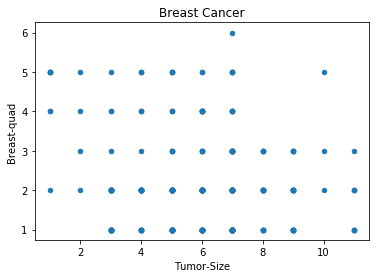

In [76]:
df.plot.scatter(x='Tumor-Size', y='Breast-quad', title='Breast Cancer')

    =>Dari data diatas kita dapat mengklasifikasikan data, dengan 
    membandingkan 2 attribute yaitu Tumor-Size atau ukuran tumor 
    dengan Breast-quad atau letak cancer

In [54]:
df['Class'].value_counts()

1    200
2     85
Name: Class, dtype: int64

    Pada data diatas, diketahui bahwa Class 1 memiliki 200 instance 
    Attribute dan Class 2 memiliki 85 Attribute
    
    Dari kedua Class tersebut, yaitu class 1 dan 2 dapat dikategorikan. 
    Class 1 dikategorikan dengan cancer jinak, sedangkan Class 2 
    dikategorikan dengan cancer ganas.

In [58]:
benign = df[df['Class'] == 1]
malignant = df[df['Class'] == 2]


    => benign kita masukkan dalam class 1, dimana merupakan cancer jinak
    => malignant kita masukkan dalam class 2, dimana dikategorikan sebagai cancer ganas

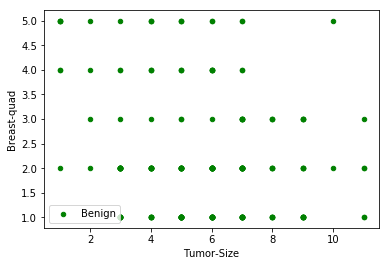

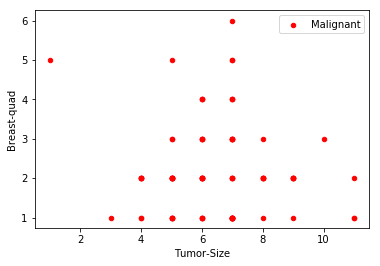

In [19]:
benign.plot(kind= 'scatter', x='Tumor-Size', y='Breast-quad', color='green', label = "Benign")
malignant.plot(kind= 'scatter', x='Tumor-Size', y='Breast-quad', color='red', label = "Malignant")


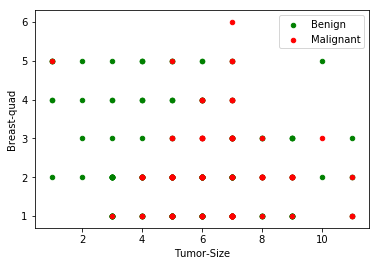

In [20]:
axes = benign.plot(kind= 'scatter', x='Tumor-Size', y='Breast-quad', color='green', label = "Benign")
malignant.plot(kind= 'scatter', x='Tumor-Size', y='Breast-quad', color='red', label = "Malignant", ax = axes)


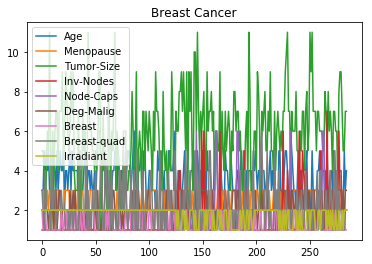

In [88]:
df.drop(['Class'], axis=1).plot.line(title='Breast Cancer')

    => Data diatas merupakan plot line dari data Class

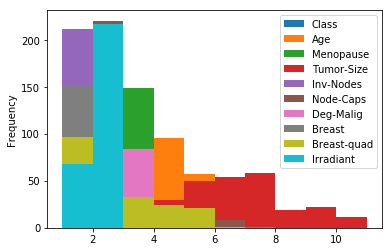

In [49]:
df.plot.hist()

    => Data diatas merupakan histogram dari semua attribute yang terdapat dalam dataset

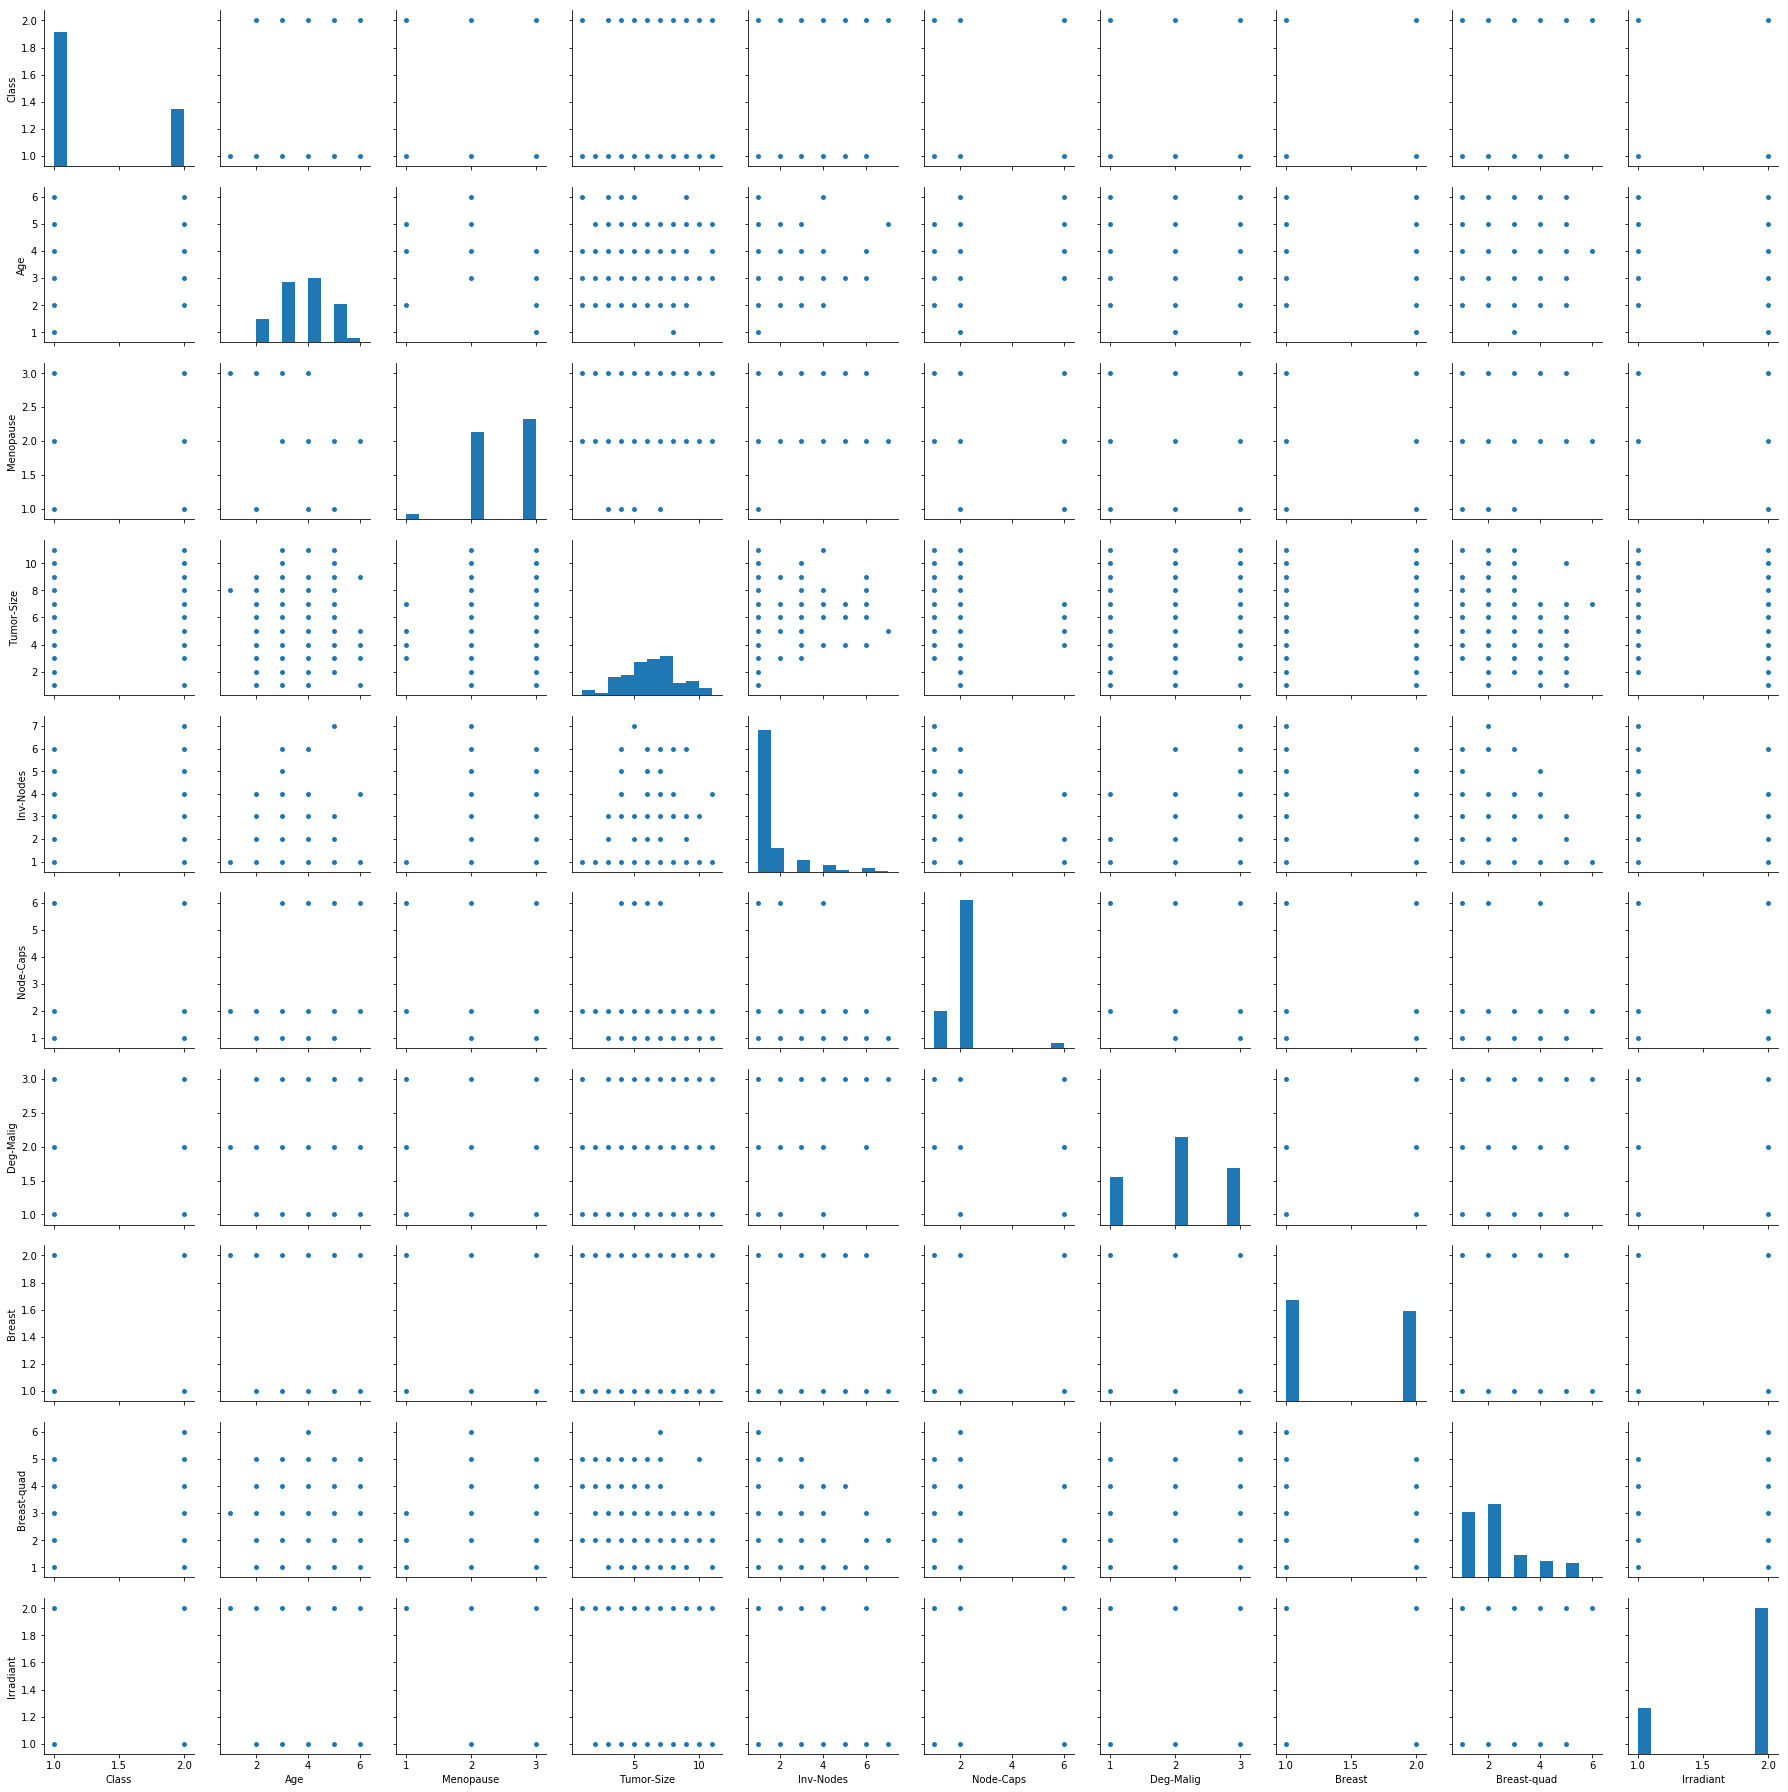

In [50]:
import seaborn as sns
sns.pairplot(df)

    => Dari data diatas dapat dilihat plot dan grafik dari semua attribute 
    yang terdapat dalam dataset

In [22]:
df['Age'].value_counts()

4    96
3    90
5    57
2    35
6     6
1     1
Name: Age, dtype: int64

In [23]:
df['Menopause'].value_counts()

3    149
2    129
1      7
Name: Menopause, dtype: int64

In [24]:
df['Tumor-Size'].value_counts()

7     59
6     54
5     50
4     30
3     28
9     22
8     19
11     8
1      8
2      4
10     3
Name: Tumor-Size, dtype: int64

In [25]:
df['Inv-Nodes'].value_counts()

1    212
2     36
3     17
4     10
6      6
5      3
7      1
Name: Inv-Nodes, dtype: int64

In [26]:
df['Node-Caps'].value_counts()

2    221
1     56
6      8
Name: Node-Caps, dtype: int64

In [27]:
df['Deg-Malig'].value_counts()

2    130
3     84
1     71
Name: Deg-Malig, dtype: int64

In [28]:
df['Breast'].value_counts()

1    151
2    134
Name: Breast, dtype: int64

In [29]:
df['Breast-quad'].value_counts()

2    109
1     97
3     33
4     24
5     21
6      1
Name: Breast-quad, dtype: int64

In [30]:
df['Irradiant'].value_counts()

2    217
1     68
Name: Irradiant, dtype: int64

## 3.Training dan Testing Data

In [31]:
df.columns = ["Class", "Age", "Menopause", "Tumor-Size", "Inv-Nodes", "Node-Caps", "Deg-Malig", "Breast", "Breast-quad","Irradiant" ]
df.dtypes

Class          int64
Age            int64
Menopause      int64
Tumor-Size     int64
Inv-Nodes      int64
Node-Caps      int64
Deg-Malig      int64
Breast         int64
Breast-quad    int64
Irradiant      int64
dtype: object

    => Dari data diatas, dilihat bahwa semua data bertipe Integer atau 
    berupa angka

In [33]:
feature_df = df[['Class', 'Age', 'Menopause', 'Tumor-Size', 'Inv-Nodes', 'Node-Caps',
       'Deg-Malig', 'Breast', 'Breast-quad', 'Irradiant']]

In [34]:
x = np.asarray(feature_df)
y = np.asarray(df['Class'])


In [35]:
x

array([[1, 3, 3, ..., 2, 3, 2],
       [1, 3, 3, ..., 1, 2, 2],
       [1, 5, 2, ..., 2, 1, 2],
       ...,
       [2, 5, 2, ..., 2, 1, 2],
       [2, 3, 2, ..., 1, 2, 2],
       [2, 4, 2, ..., 1, 2, 2]], dtype=int64)

In [36]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)


In [38]:
x_train.shape

(228, 10)

In [39]:
x_test.shape

(57, 10)

In [40]:
y_train.shape

(228,)

In [41]:
y_test.shape

(57,)

### Pada data tersebut terdapat 228 data untuk Training dan 57 data untuk Testing, dengan mengambil 20% dari test_size

## 4. Klasifikasi data dengan Support Vector Machine

In [42]:
from sklearn import svm

In [43]:
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C= 0.3 )

### Klasifikasi dari data menggunakan kernel, gamma dan C
    1. Kernel merupakan class of algiriths untuk analisis pola
    2. Gamma digunakan untuk menentukan jarak suatu sampel data 
    3. C digunakan untuk menentukan berapa banyak sampel yang boleh 
    ditempatkan di kelas yang berbeda 

In [44]:
classifier.fit(x_train, y_train)


SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
y_predicted = classifier.predict(x_test)

    Langkah-Langkah dalam menyelesaikan Persamaan menggunakan SVM 
    (Support Vector Machine) :

    Untuk dapat menggunakan metode Support Vector Mechine (SVN) maka,langkah pertama yaitu dengan menghitung nilai matriks menggunakan Persamaan 1.
   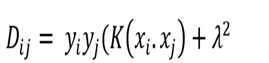

    Lalu mencari nilai error dengan menggunakan Persamaan ke 2.
   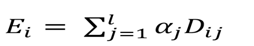

    Dari hasil error tersebut, kemudian dihitung nilai delta, dengan menggunakan Persamaan 3.
   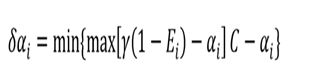

    Setelah mencari nilai dari delta alpha, maka langkah selanjutnya adalah mencari nilai alpha dengan menggunakan Persamaan 4.
   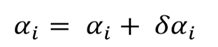

    Jika nilai alpha lebih besar dari epsilon, maka iterasi akan terus  berlanjut hingga nilai alpha tidak ada perubahan signifikan. Kemudian mencari nilai Bias dengan menggunakan Persamaan 5.
   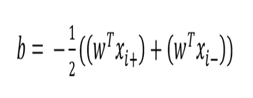

    Nilai w merupakan bobot dot product data. Setelah mendapat nilai alpha (𝛼), bias (𝑏) dan bobot (w), maka dapat dilakukan proses pengujian untuk menentukan fungsi keputusan (decision). Perhitungan fungsi keputusan menggunakan Persamaan 6.
   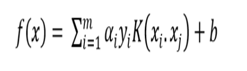

    Sumber:
    [1] Dharsono Yulius Paulus, Pardamean Amsal, Rifai  Achmad, and Gata Windu, “Analisa Sentimen Dengan Korpus Sentiment140 Menggunakan Classifier Support Vector Machine Rbf,” Vol. 12 No. 2 Hal.89-97 Juni 2020.

## 5. Mengevaluasi hasil, check precision, recall and f1 score

In [46]:
from sklearn.metrics import classification_report


In [47]:
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        42
          2       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        57



    Dari data diatas dapat dilihat, bahwa precision 100 % untuk class 1 dan 2
    
    Dari hasil perhitungan spesifikasi, presisi, akurasi dan error. Selanjutnya menggunakan perhitungan dari confusion matrix menggunakan persamaan dibawah ini.
    
    System Calculates dari precision tersebut didapat dari:

  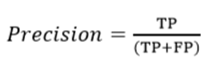

    Recall didapat dari:
   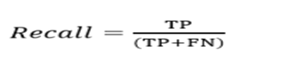

    f1-score didapat dari:
   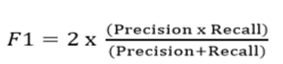


    Keterangan:
    TP  	: True positif
    TN	 : True Negative
    FP 	 : False Positif
    FN 	 : False Negative
    
    Sumber : 
    [1] Dharsono Yulius Paulus, Pardamean Amsal, Rifai  Achmad, and Gata Windu, “Analisa Sentimen Dengan Korpus Sentiment140 Menggunakan Classifier Support Vector Machine Rbf,” Vol. 12 No. 2 Hal.89-97 Juni 2020.